<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 의료비 예측


<img src = "https://github.com/Jangrae/img/blob/master/medical.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 하위 몇 개 행 확인
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계정보 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [8]:
# 상관분석
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


5-2) 상관관계를 시각화해 확인합니다.

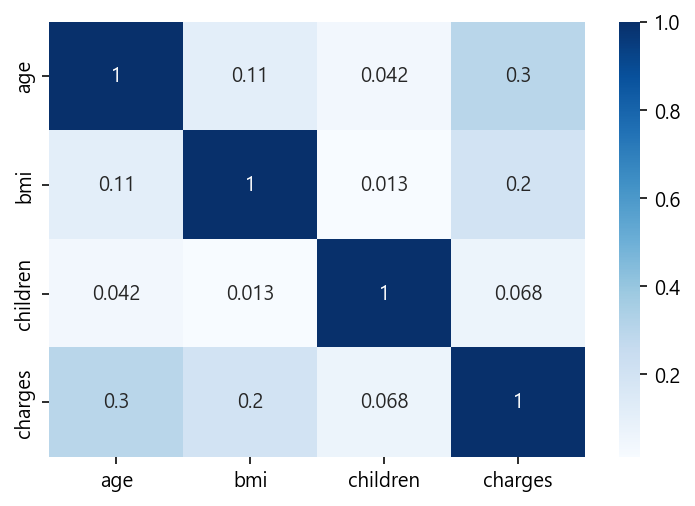

In [9]:
# 상관분석
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

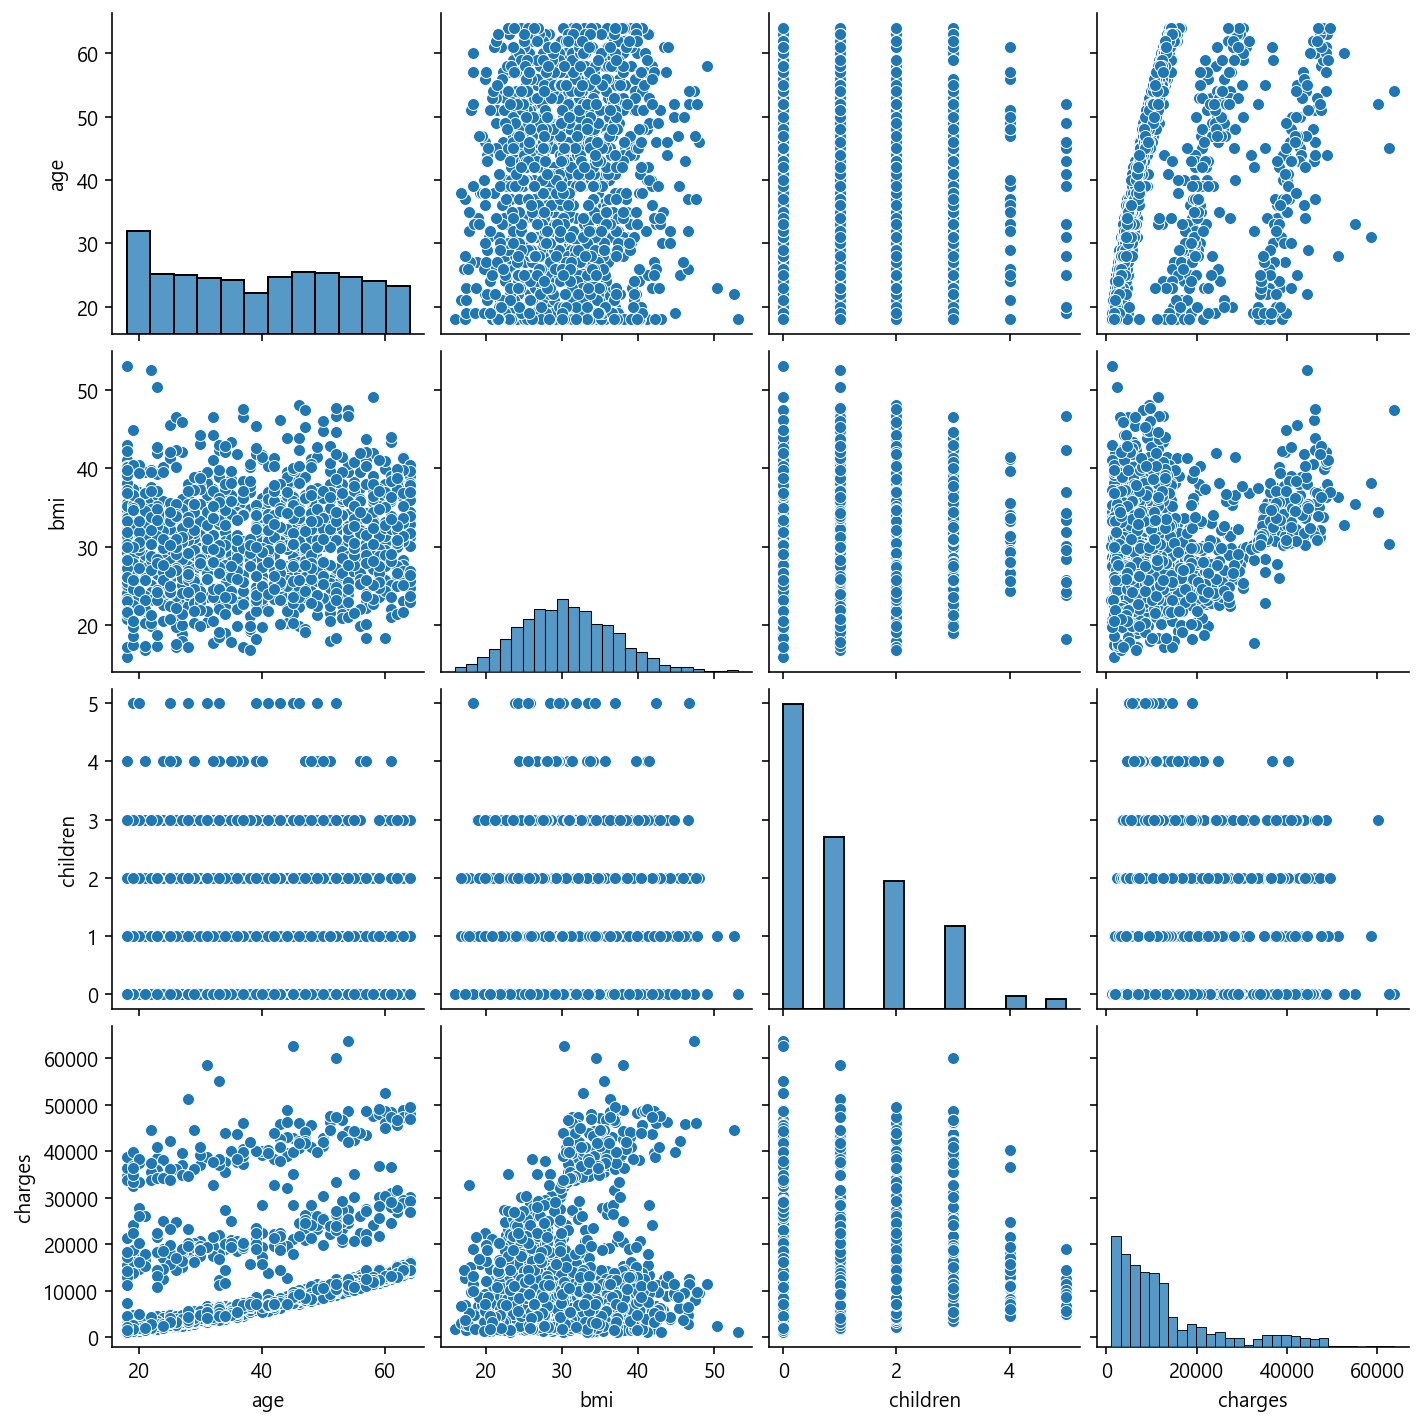

In [10]:
sns.pairplot(data)
plt.show()

- (의견) 나이와 의료비에는 양의 상관관계가 있는 것으로 보인다.
- (의견) bmi와 의료비에는 양의 상관관계가 있는 것으로 보이나 선형성이 약해 나누어 분석해볼 필요가 있다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [14]:
# 범주값 개수 확인
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**7) 주요 변수 확인**

7-1) charges 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

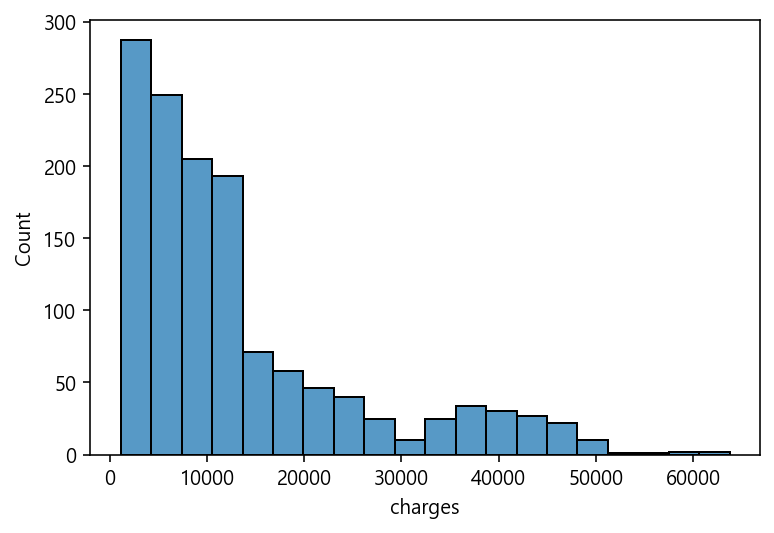

In [19]:
# charges 값 분포
target = 'charges'
sns.histplot(data[target], bins=20)
plt.show()

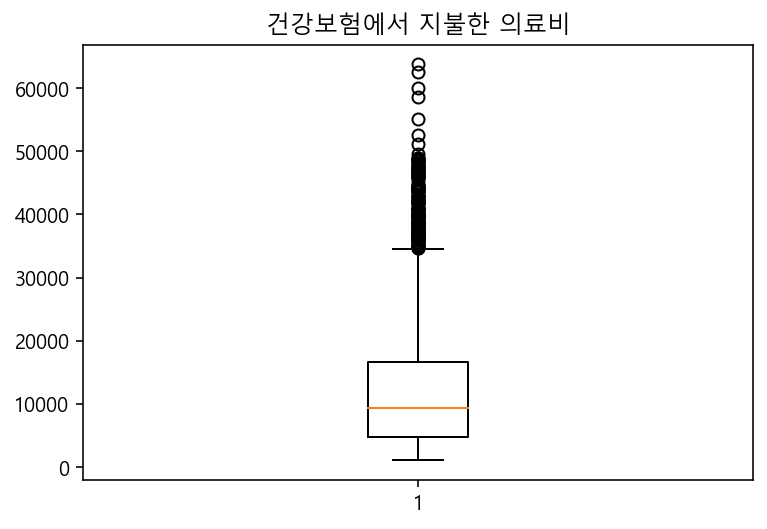

[4740.28715 1121.8739 ]
[16639.912515 34472.841   ]


In [69]:
box = plt.boxplot(data[target])
plt.title('건강보험에서 지불한 의료비')
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

- (의견) 대략 16600달러 이하에 전체 데이터의 75%가 분포되어 있다.
- (의견) 35000달러를 넘어가는 의료비에 대해서는 이상치로 검토해볼 필요가 있다.

7-2) age, charges 변수간 상관관계를 산점도(Scatter Plot)으로 시각화해 확인합니다.

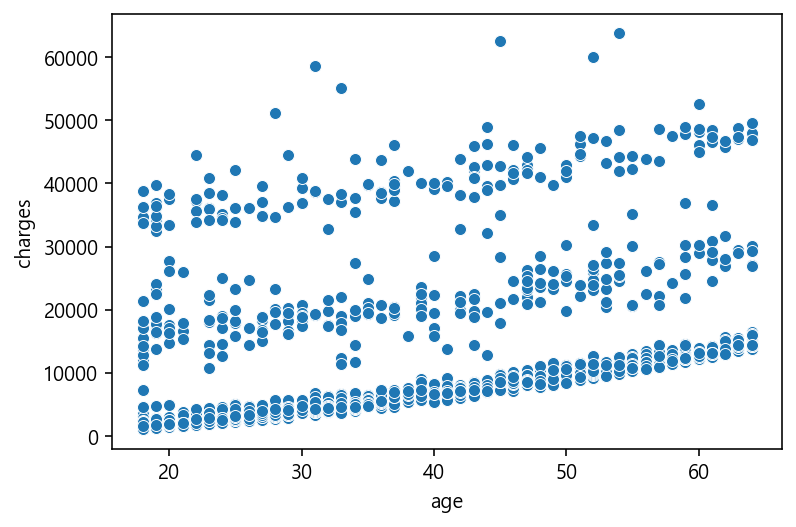

In [15]:
# age, charges 상관관계
sns.scatterplot(data['age'], data['charges'])
plt.show()

- (의견) 나이가 많을수록 의료비 납부금액은 올라간다.
- (의견) 10000이하, 10000에서 30000, 30000이상으로 납부금액이 분리되어 있는 것으로 볼때 가입보험의 종류가 다른지 생각해볼 필요가 있다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

- sex, smoker, region 변수들에 대한 가변수화를 진행 합니다.

In [21]:
# 가변수화
dummy_vars = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

# 확인
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**2) 상관분석**

2-1) 변수가 추가되었으니 변수들 간의 상관관계를 다시 확인합니다.

In [22]:
# 상관분석
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


2-2) 변수들 간의 상관관계를 다시 시각화해 확인합니다.

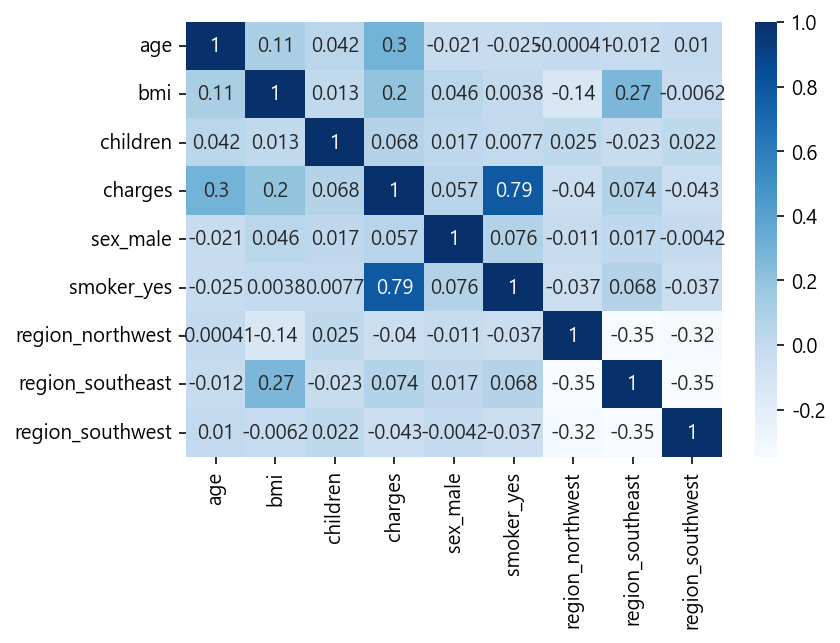

In [23]:
# 상관분석
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

- (의견) 흡연자와 의료비와의 상관관계가 굉장히 높은 수치를 기록하였다.
- (의견) 성별과 지역은 의료비와의 상관관계가 굉장히 낮게 나타난다.
- (의견) 흡연여부를 주요한 변수로 생각하여 분석을 진행할 필요가 있다.

**3) x, y 분리**

- charges 변수가 Target입니다.

In [25]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [26]:
# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [27]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용이 있으면 이를 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

### 4.1.1.모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [28]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# 2단계: 선언하기
model = LinearRegression()

In [30]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [32]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 4023.060412326257
R2: 0.7815638027456551


### 4.1.2.회귀 계수 확인

- 모델의 coef_, intercept_ 속성으로 변수들의 회귀 계수를 확인합니다.

In [33]:
# 회귀 계수 확인
print(model.coef_)
print(model.intercept_)

[  243.60038821   306.46006963   472.73303281  -221.31454859
 23707.39225536  -121.77571388 -1088.93802262  -877.25427208]
-10334.708051219157


- 모델의 회귀 계수(coef_)를 가로막대 그래프로 시각화해 확인합니다.

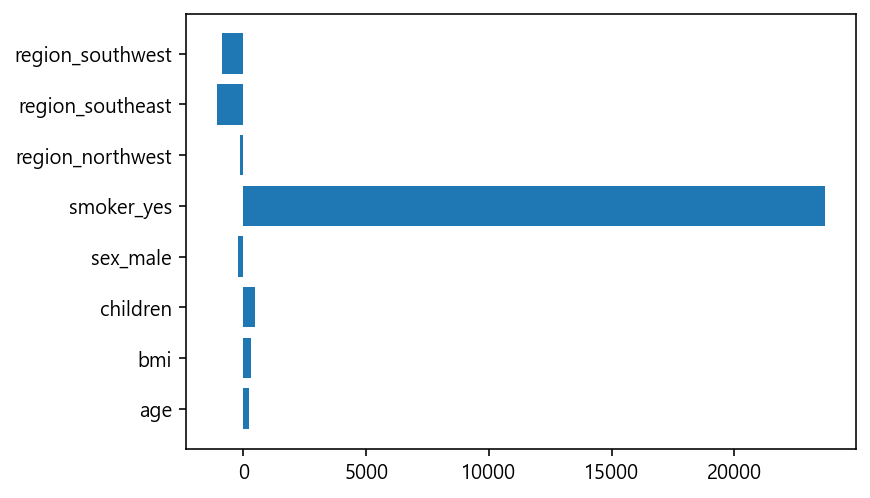

In [34]:
# 변수별 회귀계수 시각화
plt.barh(list(x), model.coef_)
plt.show()

- (의견) 흡연여부가 의료비에 가장 많은 영향을 끼치는 것을 확인할 수 있다.
- (의견) 거주지역이 남부일 경우 의료비의 음의 영향을 주며 이 지역사람들이 납부하는 의료비가 낮을 것으로 예상된다.

### 4.1.3.성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [35]:
# 성능 정보 수집
score={}
score['Linear Regression'] = r2_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [36]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor

In [37]:
# 2단계: 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [38]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [39]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [40]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 2881.683901691543
R2: 0.7442120624775168


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [41]:
# 중요도 확인
model.feature_importances_

array([0.13245768, 0.20970548, 0.01944122, 0.0051565 , 0.61850291,
       0.00548565, 0.00755326, 0.00169731])

- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

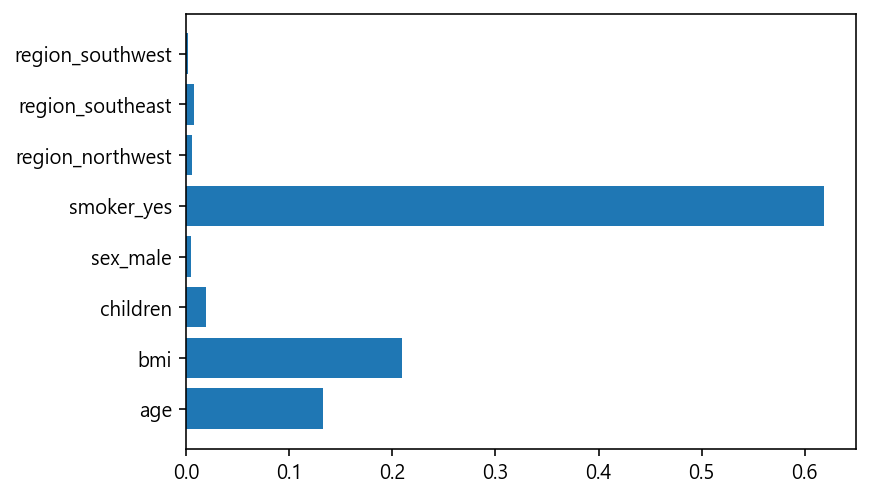

In [42]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 흡연여부가 의료비에 가장 큰 영향을 미친다.
- (의견) bmi와 나이가 그 다음으로 영향을 차지하며 보험에서 납부하는 의료비 금액은 건강과 연관이 크다라고 생각할 수 있다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [43]:
# 성능 정보 수집
score['Decision Tree'] = r2_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [44]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestRegressor

In [45]:
# 2단계: 선언하기
model = RandomForestRegressor(random_state=2022)

In [46]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [47]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [48]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 2546.9596018735906
R2: 0.8626561004669977


### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [49]:
# 중요도 확인
model.feature_importances_

array([0.13058358, 0.20652291, 0.02258343, 0.00627828, 0.61625573,
       0.00663591, 0.00637816, 0.004762  ])

- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

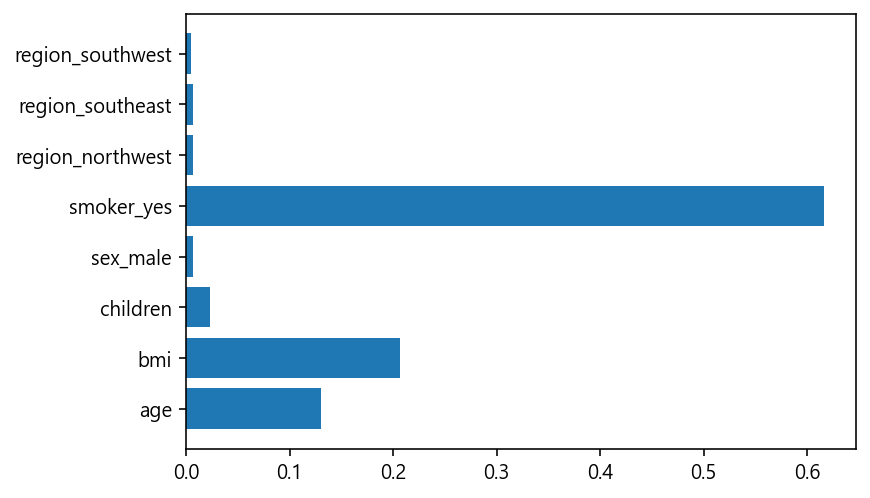

In [50]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 흡연여부, bmi, age가 의료비에 영향을 끼치며 흡연여부가 영향력이 가장 강하다.
- (의견) 대체로 건강과 의료비가 커다란 관계에 있으며 자녀의 숫자도 약간의 영향이 있는 것으로 보인다.

### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [51]:
# 성능 정보 수집
score['Random Forest'] = r2_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [52]:
# 1단계: 불러오기
from xgboost import XGBRegressor

In [53]:
# 2단계: 선언하기
model = XGBRegressor(random_state=2022)

In [54]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [56]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 2983.640758507754
R2: 0.8325147792080578


### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [57]:
# 중요도 확인
model.feature_importances_

array([0.01565696, 0.01860508, 0.00777858, 0.0041144 , 0.9380717 ,
       0.00592639, 0.00505249, 0.00479442], dtype=float32)

- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

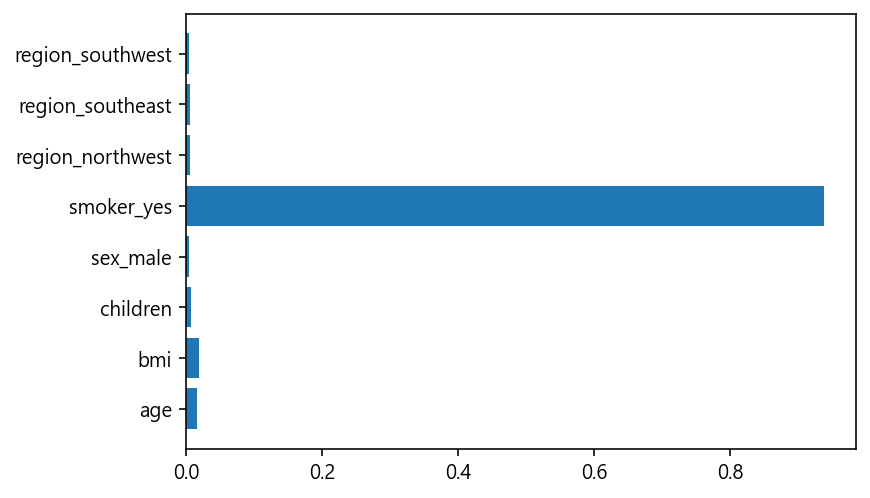

In [58]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 흡연여부가 가장 중요하다.
- (의견) bmi, 나이는 흡연여부에 비해 그 영향이 미비하다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [59]:
# 성능 정보 수집
score['XGBoost'] = r2_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.7816
-Decision Tree: 0.7442
-Random Forest: 0.8627
-XGBoost: 0.8325


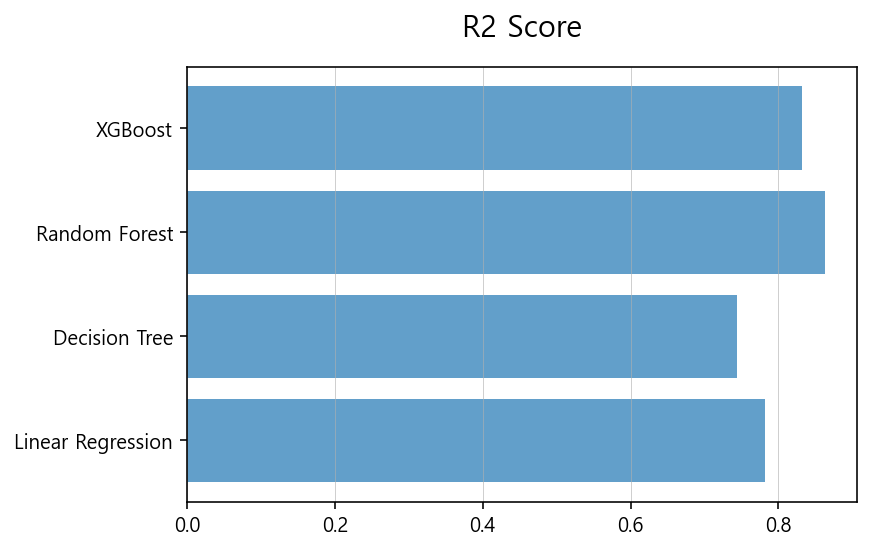

In [60]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- (의견) 랜덤포레스트가 가장 성능이 좋다.
- (의견) 모든 모델에서 흡연여부가 의료비에 가장 영향을 많이 주는것으로 나타났다.
- (의견) decision tree와 랜덤포레스트 모델에서 건강과 관련될 수 있는 지표인 나이, bmi도 유의미한 영향이 있는 것으로 나타났다.

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [63]:
# r2 스코어가 가장 높은 랜덤포레스트를 튜닝
model_r = RandomForestRegressor(random_state=2022)
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [64]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# 랜덤서치로 튜닝 진행
param = {'max_depth':range(1,51), 'n_estimators':range(50,250,10)}
model = RandomizedSearchCV(model_r, param, cv=10, n_iter=20, scoring='r2')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 2620.111224828916
R2: 0.8743625909844441


In [66]:
# 튜닝 정보
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*20)
print('최적 파라미터 : ', model.best_params_)
print('최고 성능 점수 :', model.best_score_)

[3 17 12 28 15 22 14 7 18 7 40 17 48 33 23 36 9 47 23 27]
[0.84297738 0.82550095 0.82484319 0.82651427 0.82405955 0.82578697
 0.82588172 0.83911211 0.82490778 0.83932107 0.82491992 0.82369602
 0.82571568 0.82686324 0.82655867 0.82596226 0.83080062 0.82646639
 0.82491671 0.8253331 ]
--------------------
최적 파라미터 :  {'n_estimators': 130, 'max_depth': 3}
최고 성능 점수 : 0.8429773846871308


In [67]:
# 위의 결과 최적 파라미터 주위 20~30개 구간 전체 분석
param = {'max_depth':range(1,16), 'n_estimators':range(80,201,10)}
model = GridSearchCV(model_r, param, cv=10, n_jobs=-1, scoring='r2')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*20)
print('최적 파라미터 : ', model.best_params_)
print('최고 성능 점수 :', model.best_score_)
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9
 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11
 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15
 15 15 15 15 15 15 15 15 15 15]
[0.60524208 0.6052422  0.60527284 0.60528569 0.60522668 0.60525144
 0.60522956 0.60522428 0.60520577 0.60522094 0.6052084  0.60521246
 0.60521727 0.81836641 0.81839033 0.8182918  0.81825336 0.81834977
 0.81822596 0.8181989  0.81817878 0.81814716 0.8181558  0.81812868
 0.81809787 0.81810061 0.84255347 0.84270625 0.84280774 0.84289432
 0.84299606 0.84297738 0.84303383 0.84306851 0.84301023 0.84305024
 0.84304039 0.84296921 0.84298843 0.84700824 0.84708483 0.84720167
 0.84711605 0.84723646 0.84735018 0.84723778 0.8471815 

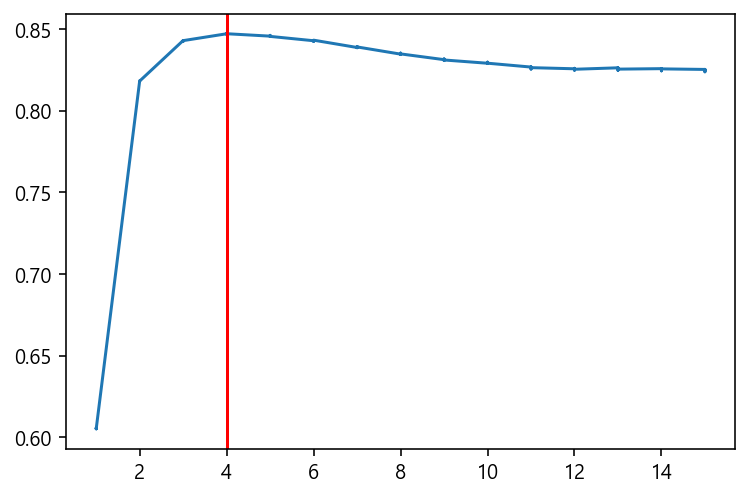

In [68]:
#시각화
pfm = pd.DataFrame()
pfm['max_depth'] = model.cv_results_['param_max_depth'].data
pfm['score'] = model.cv_results_['mean_test_score']
pfm.sort_values(by='max_depth', ascending=True, inplace=True)
plt.plot(pfm['max_depth'], pfm['score'])
plt.axvline(model.best_params_['max_depth'], color='r')
plt.show()

- (의견) 최적 파라미터를 적용하여 랜덤포레스트를 튜닝한 결과 0.879로 기존 0.862보다 0.017가량 증가하였다.
- (의견) 튜닝한 모델은 실체 예측시 더 좋은 성능을 보여주었다.
- (의견) 결정계수가 0.879이기 때문에 이 모델은 의료비를 대략 88%가량 설명할 수 있다.